In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
#import seaborn as sns
import pandas as pd

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cf

from matplotlib.colorbar import ColorbarBase

In [3]:
import cmocean

In [4]:
import graphufs
from graphufs.spatialmap import SpatialMap
plt.style.use("graphufs.plotstyle")

/work/Tim.Smith/graph-ufs/graphufs/training.py:59: UserWarning: Import failed for either mpi4py or mpi4jax.
  warnings.warn("Import failed for either mpi4py or mpi4jax.")


In [18]:
dsd = {
    k: xr.open_zarr(f"/p1-evaluation/p2/long-forecasts/graphufs.jax0.4.{k}.2019-01-01T03.2019-01-10T21.zarr/")
    for k in ["27.23_201", "27.23_202", "27", "31"]
}

In [13]:
rds = xr.open_zarr(
    "gs://noaa-ufs-gefsv13replay/ufs-hr1/0.25-degree-subsampled/03h-freq/zarr/fv3.zarr",
    storage_options={"token": "anon"},
)
rds = rds[list(x for x in dsd["27"].data_vars if x in rds)]
rds = rds.rename({
    "pfull": "level",
    "grid_yt": "lat",
    "grid_xt": "lon",
})

### MAE

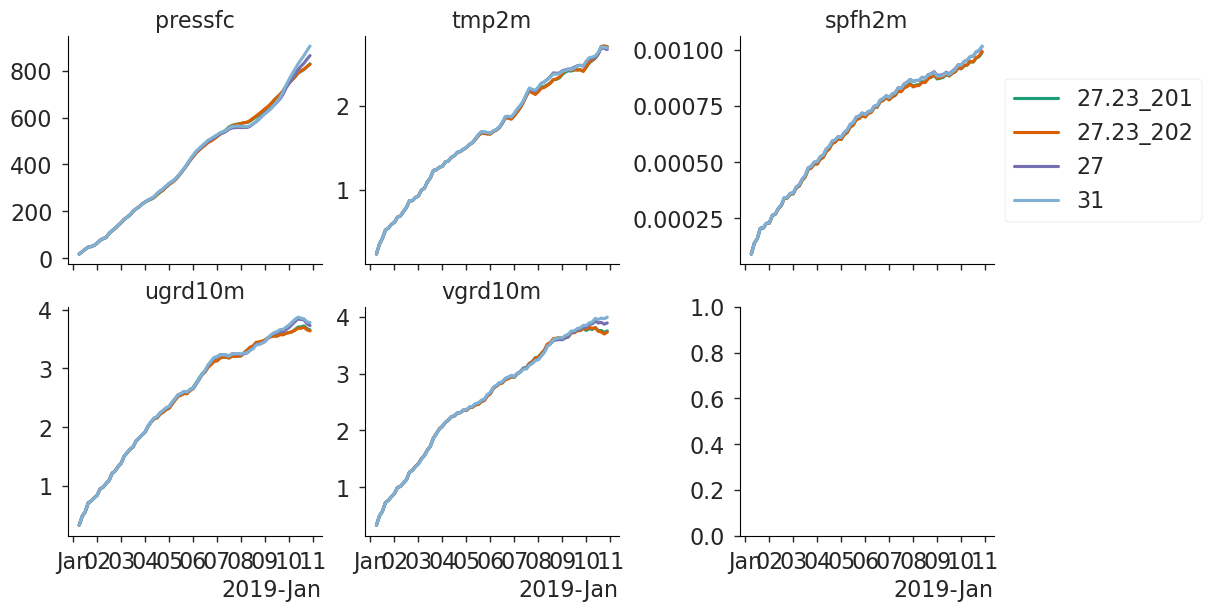

In [19]:
varlist = ["pressfc", "tmp2m", "spfh2m", "ugrd10m", "vgrd10m"]
ncols = np.ceil(len(varlist) / 2).astype(int)
nrows = 2
fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*3), constrained_layout=True, sharex=True)

for key, ax in zip(
    varlist,
    axs.flatten(),
):
    for jaxv, xds in dsd.items():
        mae = np.abs(xds[key] - rds[key]).mean(["lat", "lon"]).compute()
        
        mae.plot(ax=ax, label=jaxv)
        ax.set(title=key, ylabel="", xlabel="")
axs[0,-1].legend(bbox_to_anchor=(1., .5), loc="center left")